---
# Help Wanted
- A study of the Impact of COVID-19 on the Texas Job Market
---
**By:**
- Jeff Akins
- James Allen
- Curtis Johansen
- Veronica Reyes
- Adam Talbot

![](https://cdn.pixabay.com/photo/2016/09/09/10/43/texas-1656861_1280.jpg)

---
## Executive Summary

---

**Overview:**
* This project explored the impact of COVID-19 on the Texas job market. 98 Industries were examined using a combination of U.S. Census data and Texas Labor Market Information. Clustering analysis was used to group the industries into seven categories based on the magnitude of their job loss during the first half of 2020. For the industries that were most affected, subcategories were examined such as gender, age group, education, race, and ethnicity. Time Series modeling was then used to forecast when select industries would return to pre-COVID levels of employment. 

**Goals:**
- Explore the impact of the COVID-19 pandemic on the Texas job market
    - Explore demographic subgroups of gender, ethnicity, race, age, and education level
- Group industries together based on effect of pandemic
- Forecast recovery timelines for most-affected industries

**Conclusions/Takaways:**
- Effect on industries
    - 87% Negative Impact
    - 10% Positive Impact
    - 3% No Impact
- Recovery timelines for 11 most-affected industries varied from 3 to 26 months from end of data (June 2021)
- Demographics Most Affected
    - Gender:  Women
    - Ethnicity: Hispanic or Latino
    - Race: African Americans
    - Age: 34 and below, especially 22-24
    - Education Level:  Those without a Bachelor's or Advanced Degree

**Recommendations:**
- Industries now have a better understanding of appropriate employment levels during a pandemic
- Planning and preparation
- State and local governments should also examine the disparity among demographic subgroups

**Next Steps:**
- Adjust forecasting model as new data becomes available 
- Examine the Pandemic's affect on the national economy
- Compare industry clusters by state
- Compare demographic job loss information by state

---
## Plan
---

- [x] Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- [x] Acquire data from websites, save to local .csv and create a function to automate this process. Save the function in an wrangle.py file to import into the Final Report Notebook.
- [x] Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- [x] Explore data using clustering and visualizations
- [x] Forecast recovery timelines for most-affected industries
- [x] Document conclusions, takeaways, and next steps in the Final Report Notebook.
- [x] Iterate back through the pipeline imporving each phase as time permits

---
## Imports
---

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# sklearn imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, explained_variance_score

# time series imports
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import Holt

# pickle for reloading model object
import pickle

# # visualization settings
# plt.rc('figure', figsize=(13, 7))
# plt.rc('font', size=16)
# # sns.set_palette('tab20')

# custom modules
import wrangle as w
import explore as e

In [2]:
# visualization settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
# sns.set_palette('tab20')

---
## Acquire
Our data was acquired from the [U.S. Census Bureau](https://ledextract.ces.census.gov/static/data.html)

As well as from the [Texas Labor Market](https://texaslmi.com/LMIbyCategory/QCEW)

If you would like to download the exact data that we used then click the links below:

[US Census Overview](https://drive.google.com/file/d/1Rteq1rsyC6E6RFdc1fZ_oVWjhUIviF_t/view?usp=sharing)

[US Census with Age Subgroups](https://drive.google.com/file/d/1TOpkBlrnXzC8b66vo6SM-jXqwkgq2102/view?usp=sharing)

[US Census with Education Subgroups](https://drive.google.com/file/d/1WKscioAiYuAK4wkkgMA60s5b7YG55aMB/view?usp=sharing)

[US Census with Race and Ethnicity Subgroups](https://drive.google.com/file/d/1WTgBeApiKyn6hpT_FaCalN8O6sYsBANF/view?usp=sharing)

#### Below are the full Dataframes before Cleaning:

In [3]:
# Census Data with no Subgroups:
census = pd.read_csv('census_data_overview.csv')
# Census Data with Education Subgroups:
census_ed = pd.read_csv('LaborMarketWEducation.csv')
# Census Data with Age Subgroups:
census_age = pd.read_csv('LaborMarketWAge.csv')
# Census Data with Race and Ethnicity Subgroups:
census_race = pd.read_csv('LaborMarketWRace.csv')

---
## Prepare
---

### Clean

In [4]:
# Function to Clean the Texas Census Data with no Subgroups:
census_light = w.wrangle_census_data()

In [5]:
# Function to Clean the Texas Census Data with Education Subgroups:
ed = w.education_census_data()

In [6]:
# Function to Clean the Texas Census Data with Age Subgroups:
age = w.age_census_data()

In [7]:
# Function to Clean the Texas Census Data with Race and Ethnicity Subgroups:
r = w.race_census_data()

---
## Explore 
---

### All Level 3 Industries

In [8]:
# Function to calculate Texas Job Loss by Industry over the first half of 2020:
job_loss = e.q1_minus_q3_emp(census_light)

#### Plot of Texas Job Losses by Industry over the first half of 2020

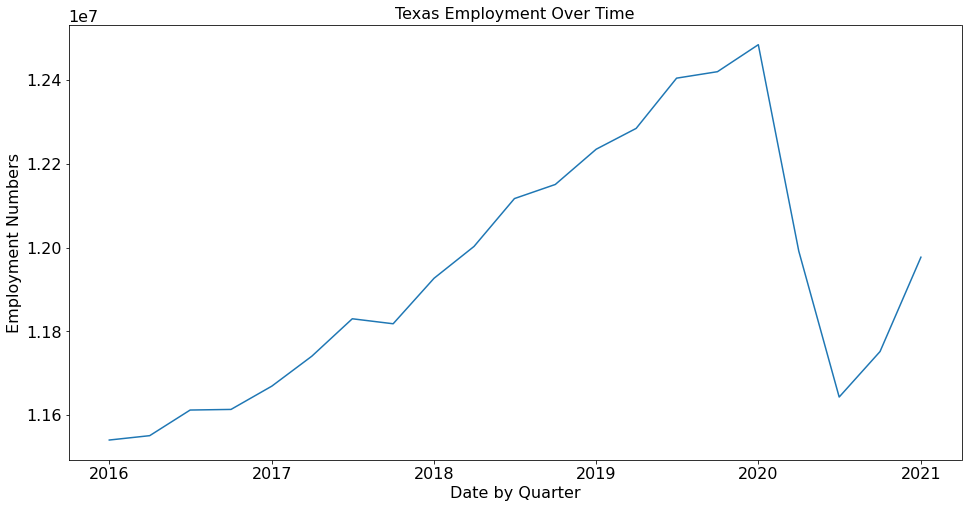

In [9]:
sum_by_date = census_light.groupby('date').sum()
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="Emp",
                palette="ch:r=-.2,d=.3_r",
                data=sum_by_date)
plt.title('Texas Employment Over Time', fontsize=16)
plt.xlabel('Date by Quarter')
plt.ylabel('Employment Numbers')
plt.show()

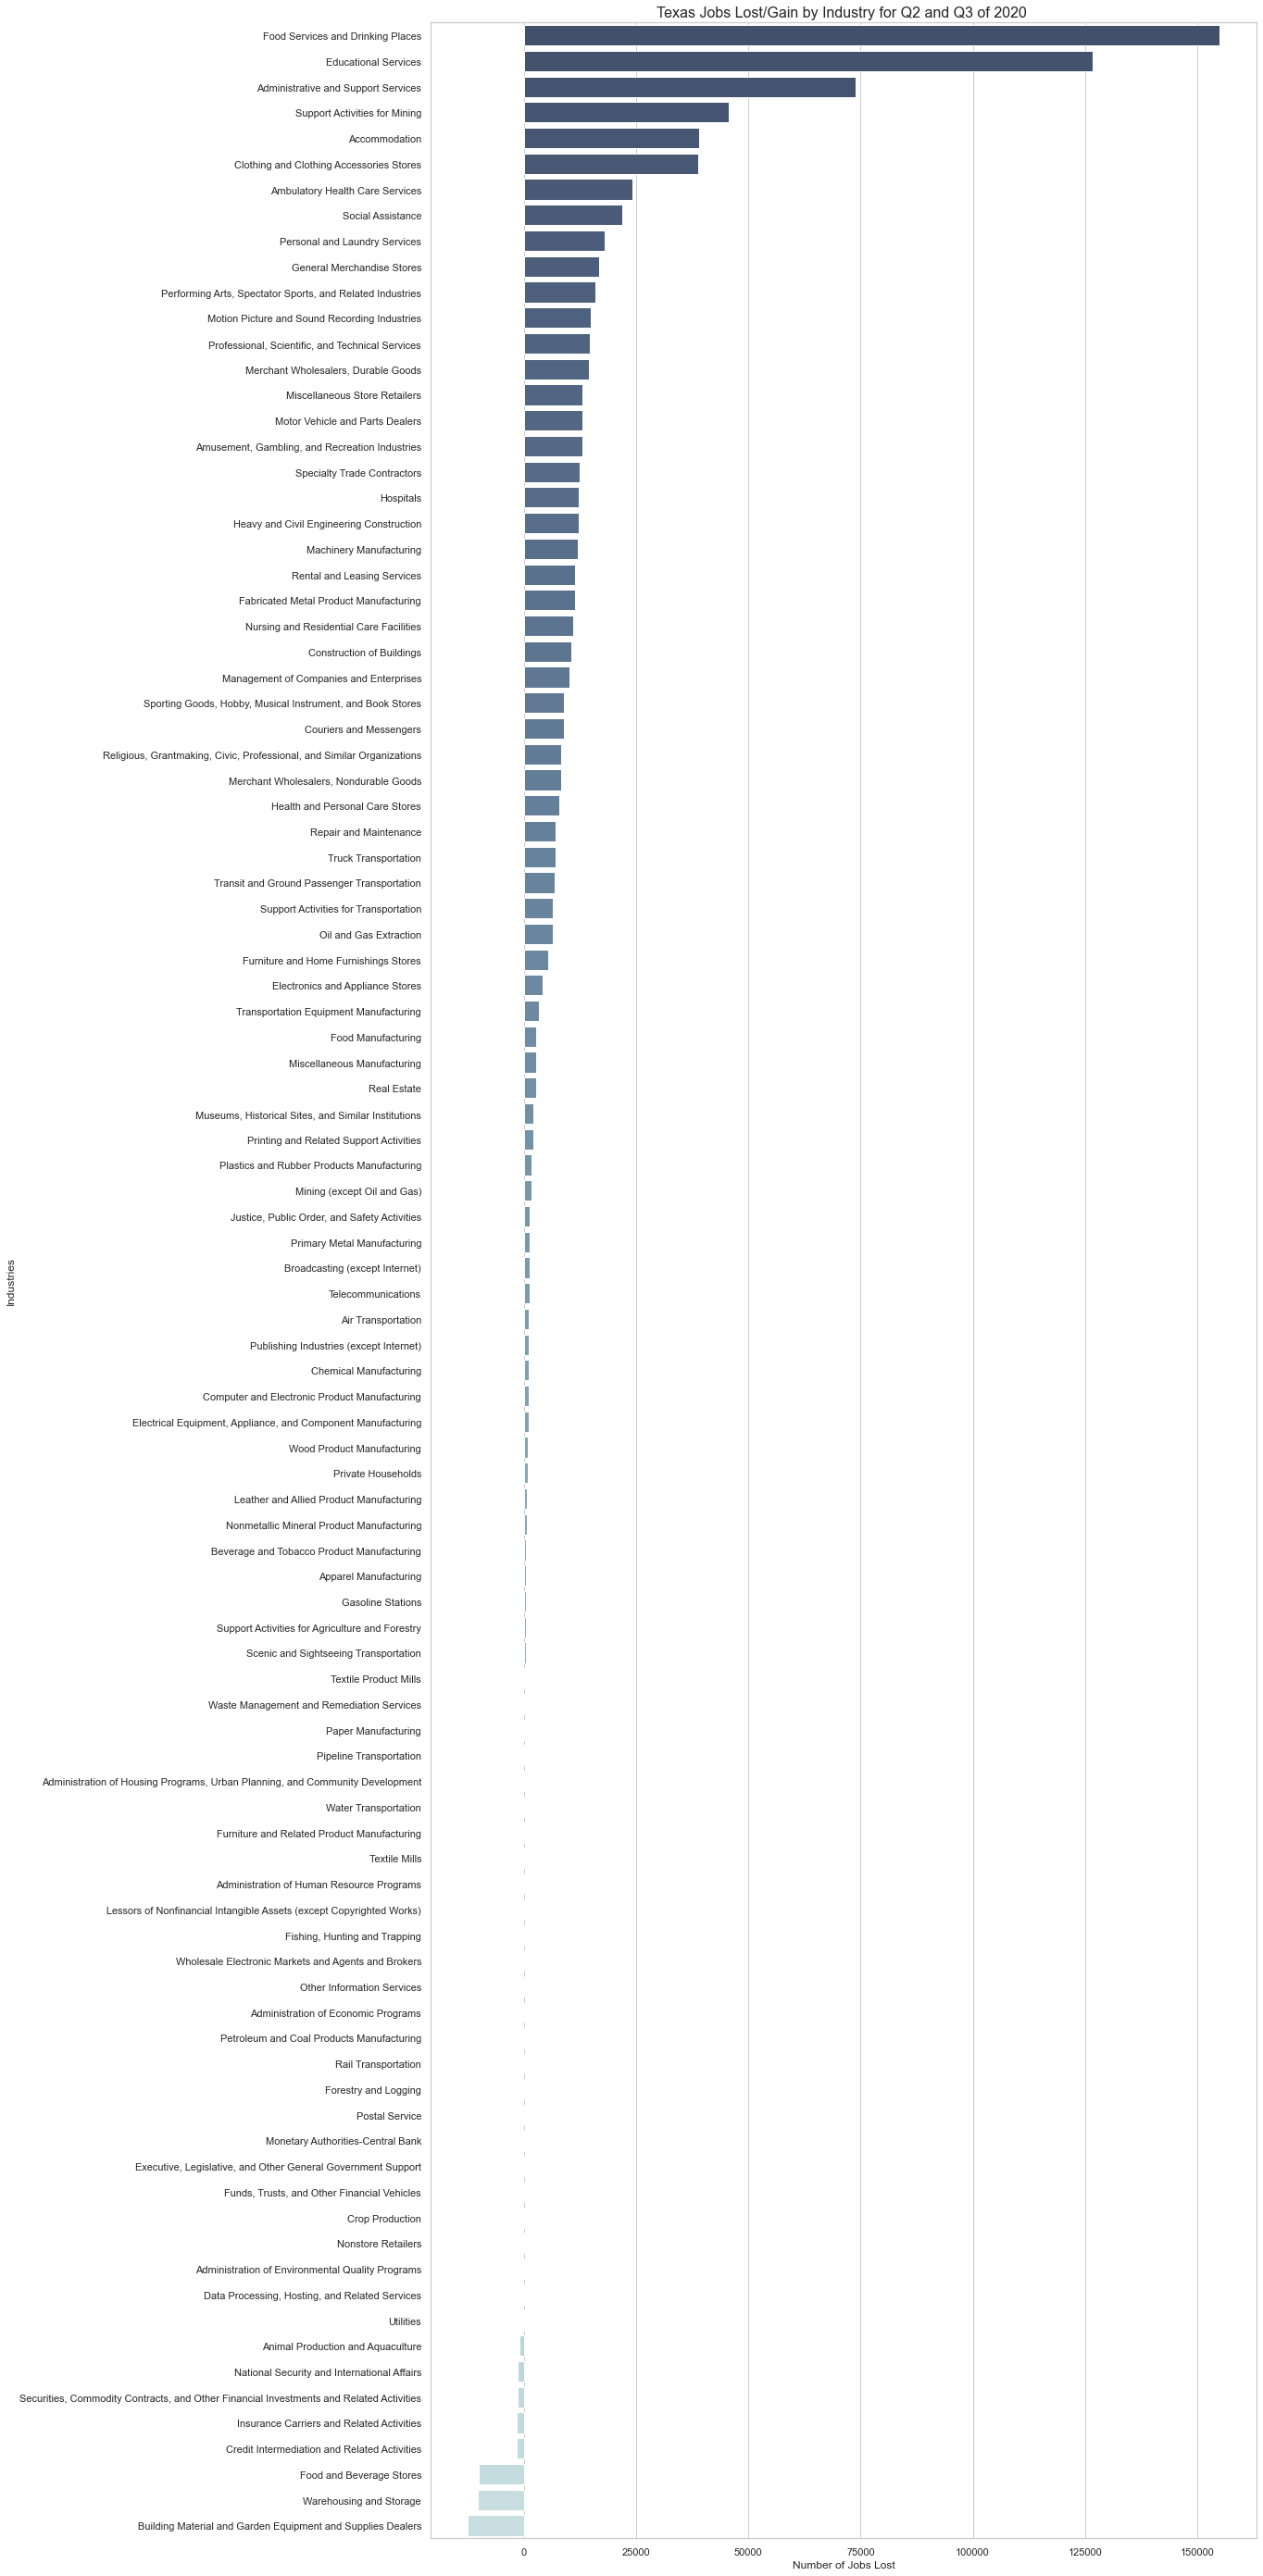

In [10]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16,50))
sns.barplot(x="q1_minus_q3", y="industry_name",
                palette="ch:r=-.2,d=.3_r",
                data=job_loss, alpha=1)
plt.title('Texas Jobs Lost/Gain by Industry for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Timeline of Employment for the Top Three Industries in the Above Chart

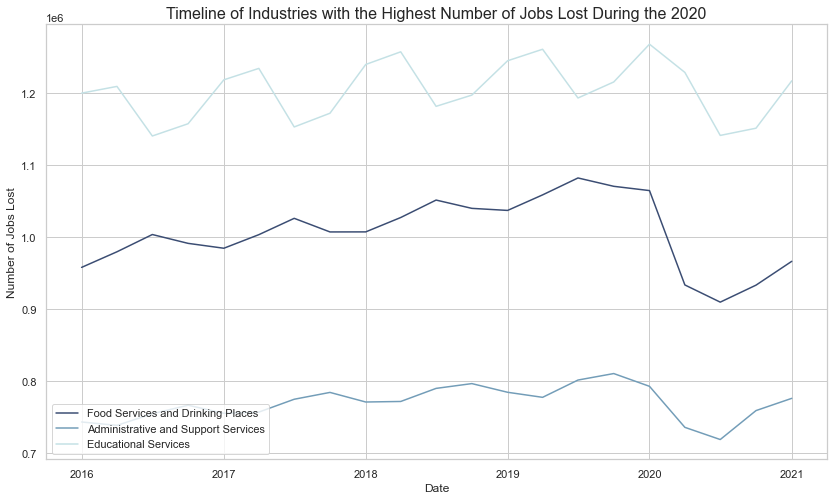

In [11]:
census_lighter = e.select_industries(census_light, 722, [561, 611])
plt.figure(figsize=(14,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="ch:r=-.2,d=.3_r",
            data=census_lighter)
plt.title('Timeline of Industries with the Highest Number of Jobs Lost During the 2020', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Number of Jobs Lost')
plt.legend(loc="lower left")
plt.show()

### Industries with highest number of job loss compared to the industry size i.e. Normalized

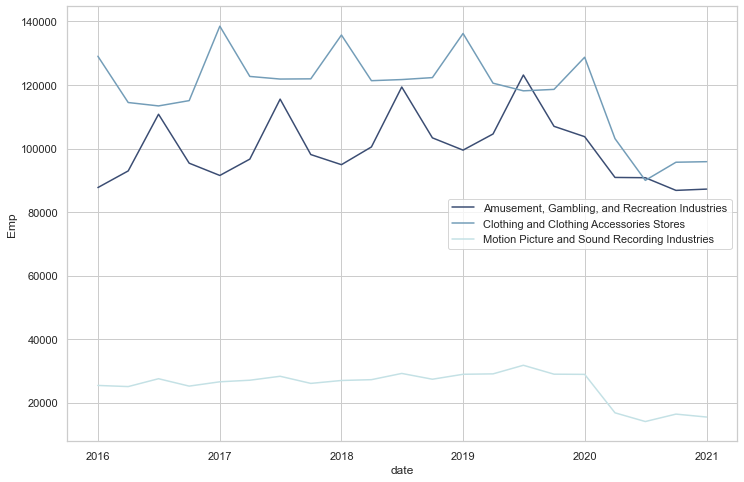

In [12]:
census_lighter1 = e.select_industries(census_light, 713, [448, 512])
plt.figure(figsize=(12,8))
sns.lineplot(x="date", y="Emp",
            hue="industry_name", palette="ch:r=-.2,d=.3_r",
            data=census_lighter1)
plt.legend()
plt.show()

---
### Demographic Subgroups
---


#### Job loss by Employee Education Level for the Industries that loss the most Jobs

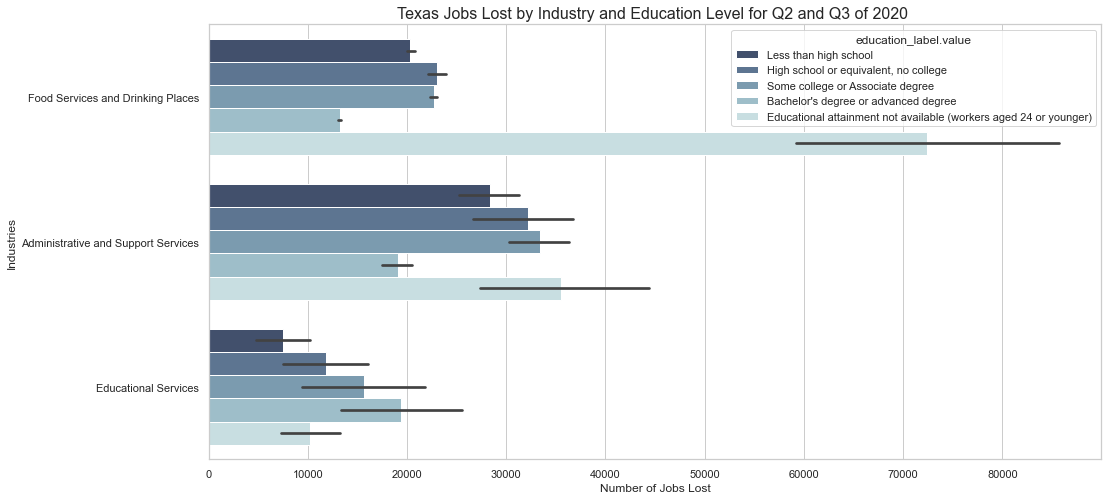

In [13]:
# Selecting the industries with the highest number of job losses
ed_top = e.select_industries(ed, 722, [561, 611])
# Selecting Q2 and Q3 2020:
ed_q2q3_sep = ed_top[(ed_top.date == '2020-04-01') | (ed_top.date == '2020-07-01')]

plt.figure(figsize=(16,8))
sns.barplot(x="Sep", y="industry_name",
                hue='education_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=ed_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Education Level for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Job loss by Male/Female for the Industries that loss the most Jobs

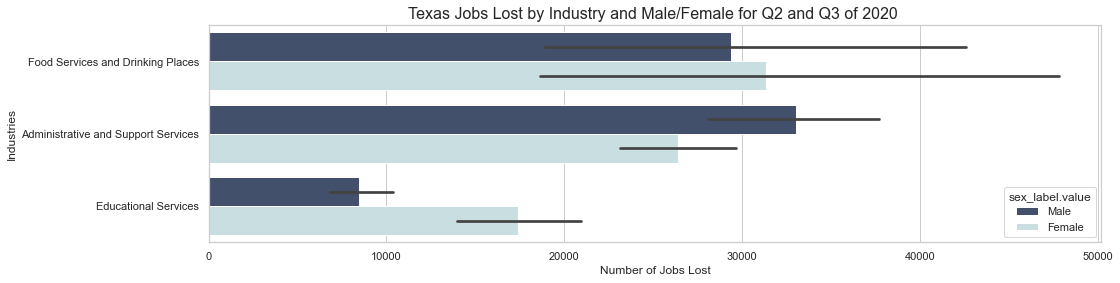

In [14]:
plt.figure(figsize=(16,4))
sns.barplot(x="Sep", y="industry_name",
                hue='sex_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=ed_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Male/Female for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Job loss by Employee Age Groups for the Industries that loss the most Jobs

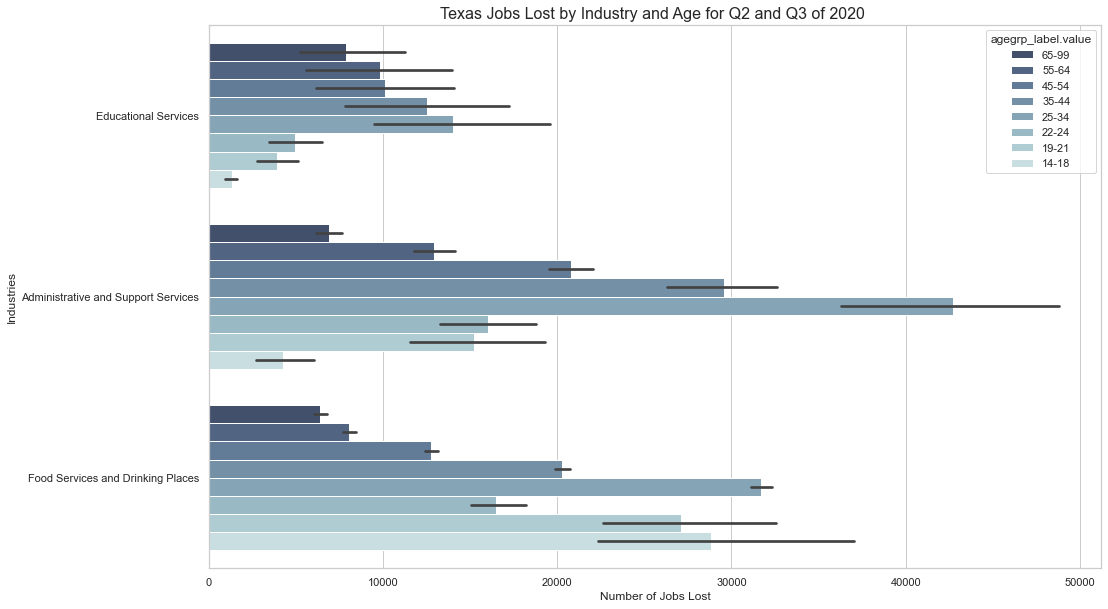

In [15]:
age_top = e.select_industries(age, 722, [561, 611])
age_q2q3_sep = age_top[(age_top.date == '2020-04-01') | (age_top.date == '2020-07-01')].sort_values('agegrp_label.value', ascending=False)
# age_q2q3_sep = e.q1_minus_q3_emp(age_top)

plt.figure(figsize=(16,10))
sns.barplot(x="Sep", y="industry_name",
                hue='agegrp_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=age_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Age for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

#### Job loss by Employee Race and Ethnicity for the Industries that loss the most Jobs

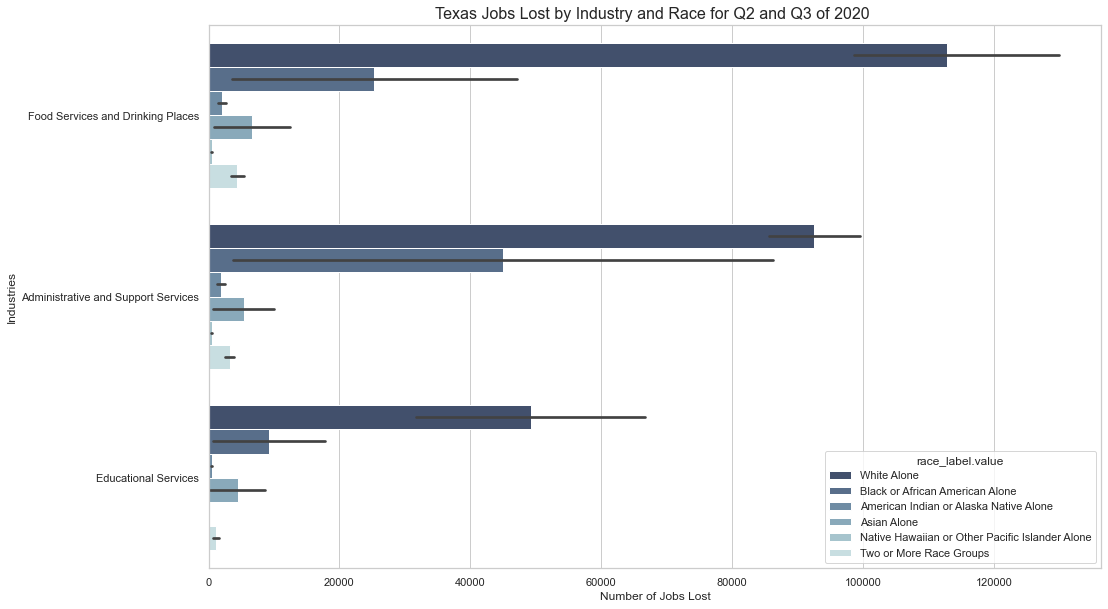

In [16]:
r_top = e.select_industries(r, 722, [561, 611])
r_q2q3_sep = r_top[(r_top.date == '2020-04-01') | (r_top.date == '2020-07-01')]

plt.figure(figsize=(16,10))
sns.barplot(x="Sep", y="industry_name",
                hue='race_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=r_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Race for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

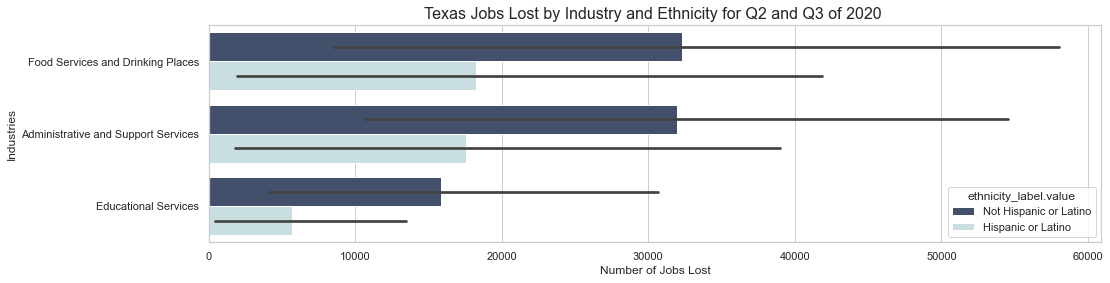

In [17]:
plt.figure(figsize=(16,4))
sns.barplot(x="Sep", y="industry_name",
                hue='ethnicity_label.value',
                palette="ch:r=-.2,d=.3_r",
                data=r_q2q3_sep, alpha=1)
plt.title('Texas Jobs Lost by Industry and Ethnicity for Q2 and Q3 of 2020 ', fontsize=16)
plt.xlabel('Number of Jobs Lost')
plt.ylabel('Industries')
plt.show()

---
### Demographic Subgroup Analysis for All of TX and Positive/Negative Groupings

---
#### Age

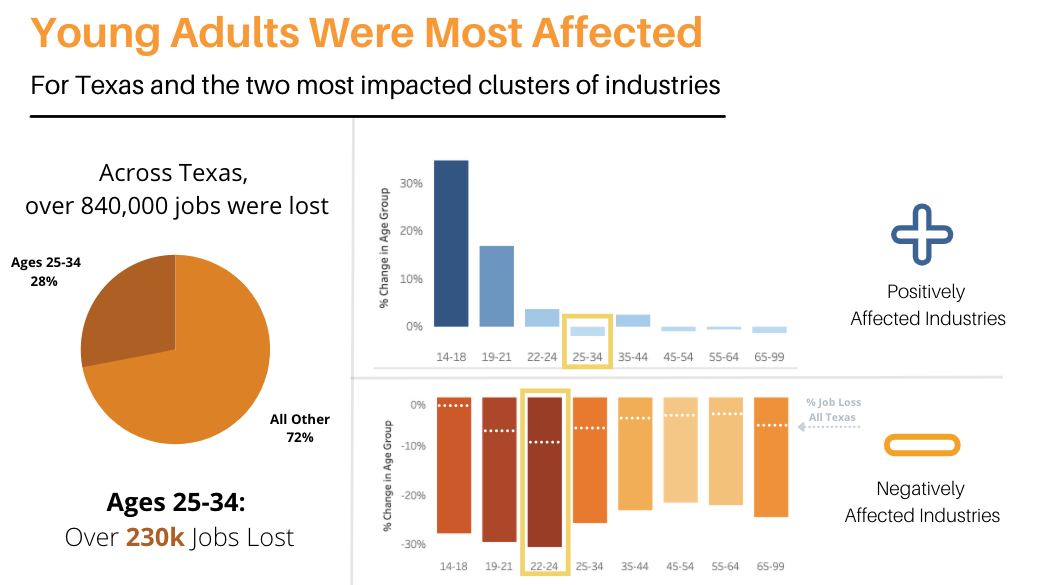

---
#### Race

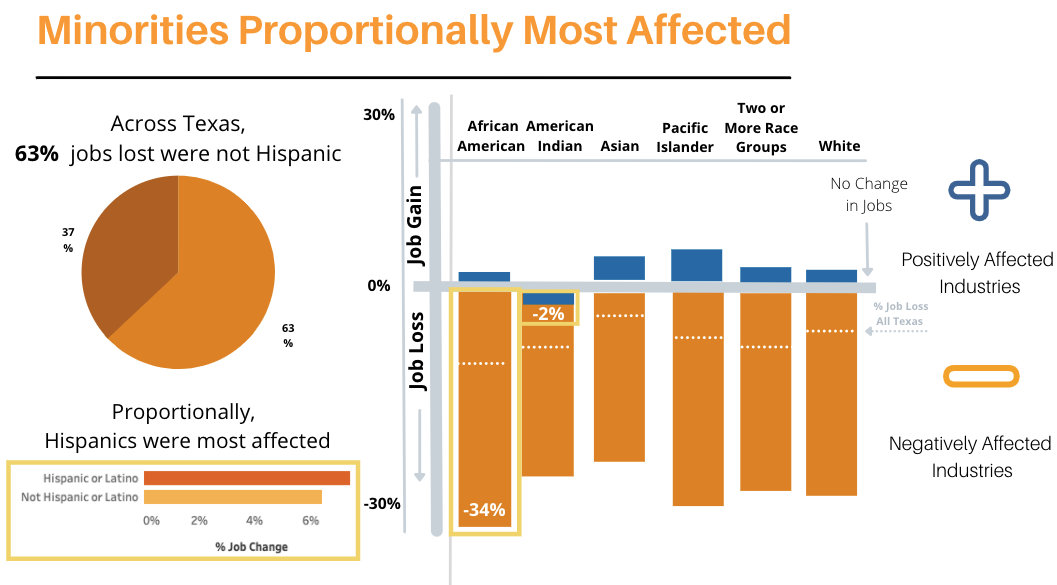

---
#### Education

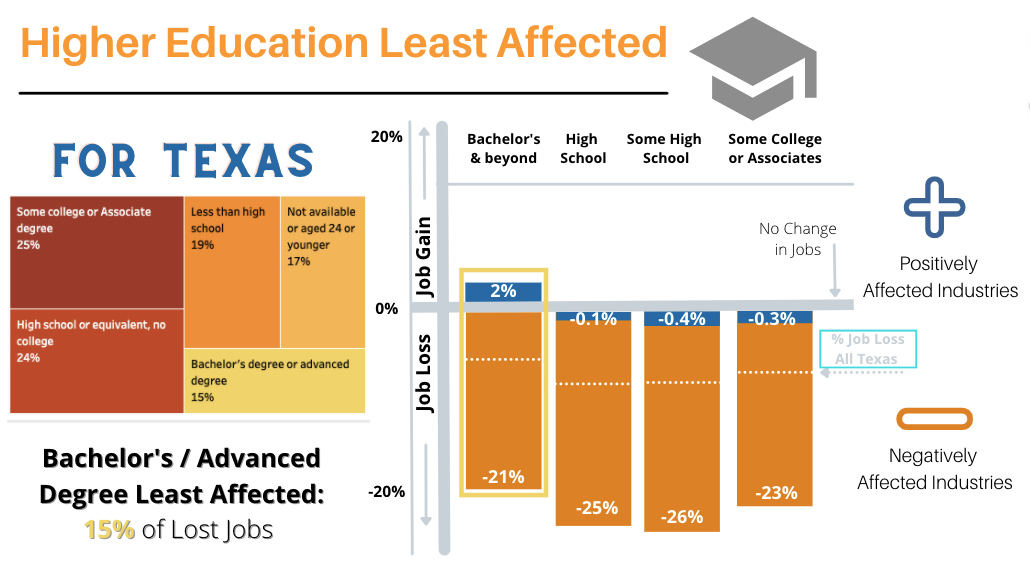

---
#### Gender

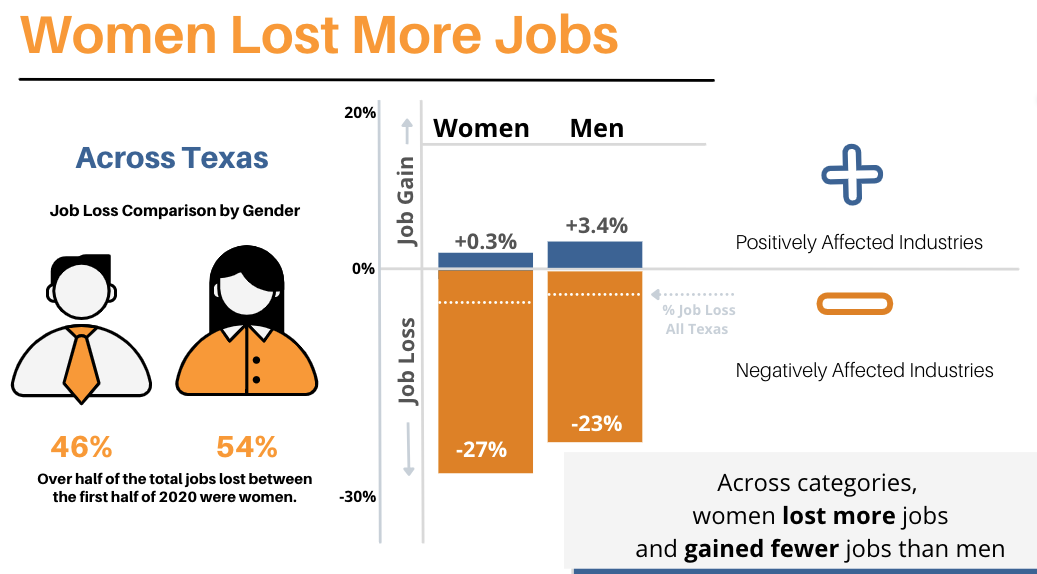

#### Takeaways:
- Young adults were most affectd
- Minorities were disproportionately affected
    - Non-minorities lost highest volume of jobs
- Higher eduaction level was least affected
- Women lost more jobs

---
### Clustering
---


In [18]:
# load model
filename = 'finalized_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

KMeans(n_clusters=7, random_state=527)

In [19]:
import matplotlib.pyplot as plt

In [20]:
# Reset ploting settings
plt.rc('figure', figsize=(13, 7))
plt.rc('font', size=16)
plt.style.use('seaborn-darkgrid')

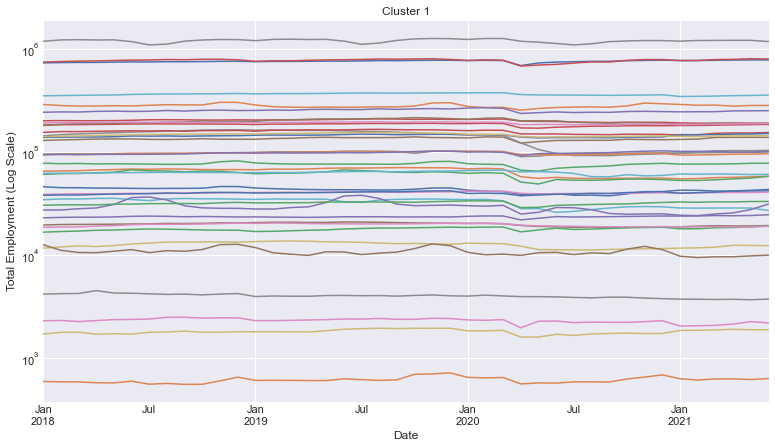

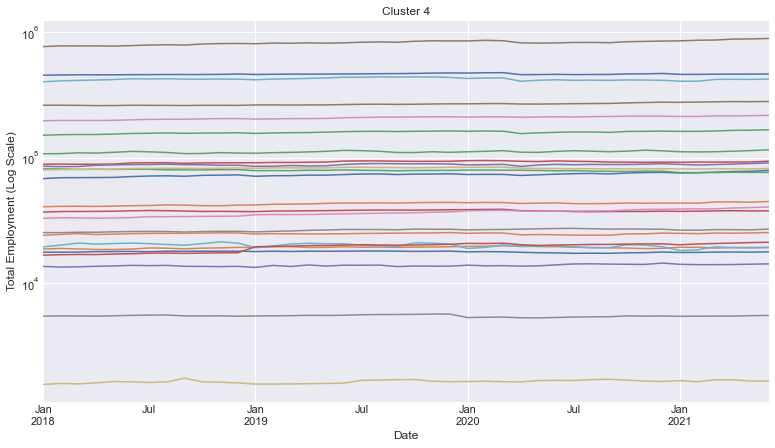

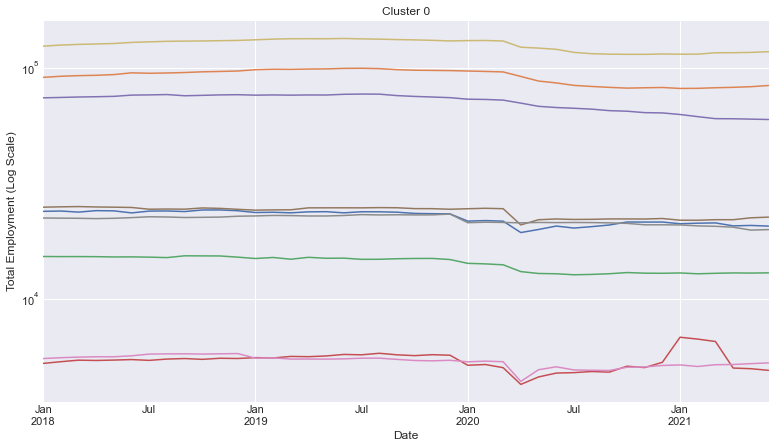

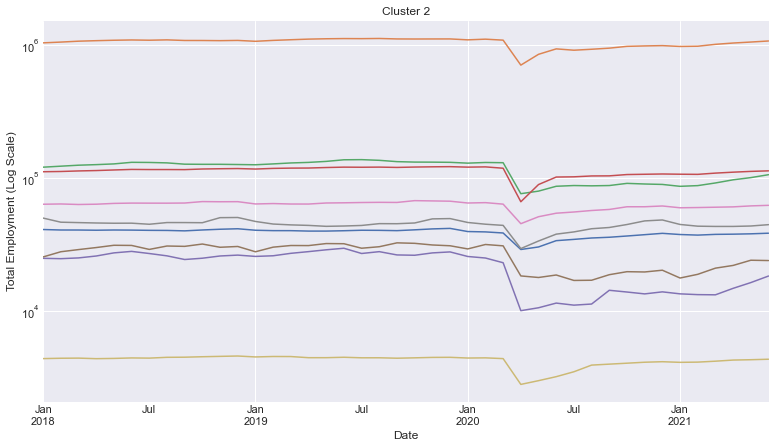

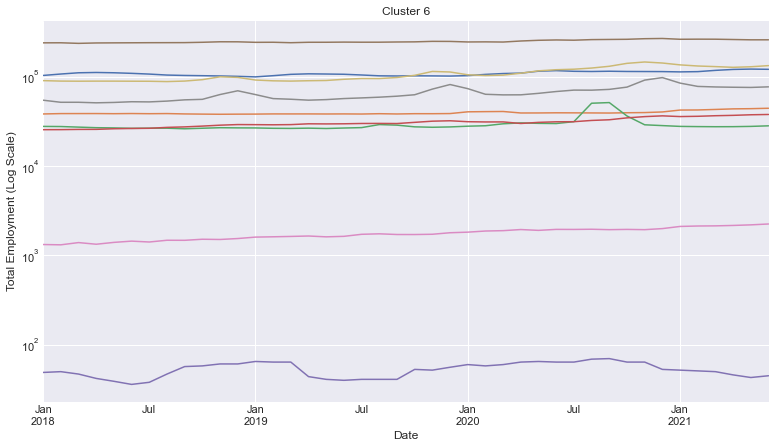

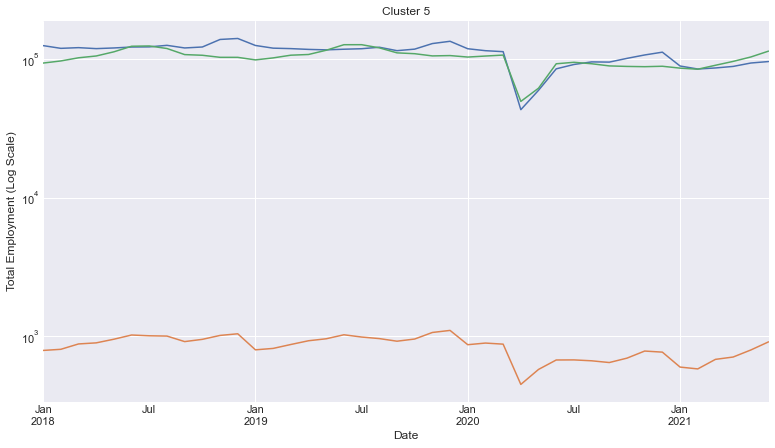

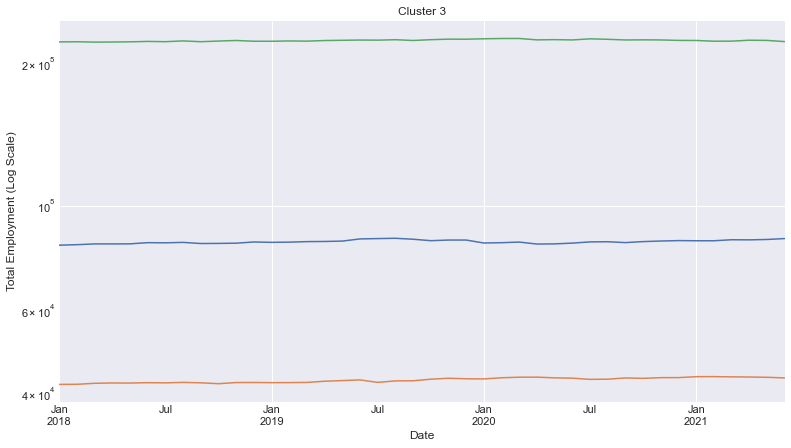

In [21]:
# acquire and prep data
df = w.get_tx_data()
# subset data into a dictionary of dfs
industry_df_dict, ind_list = w.create_df_dict(df)
# charaterize series of data for each industry to make time series data into continuous data we can cluster on
char_df = e.create_char_df(industry_df_dict, ind_list)
# scale these characterizations for clustering
scaled_char_df = e.scale(char_df, MinMaxScaler())
# cluster and plot results
char_df = e.load_cluster_and_plot_no_legend(loaded_model, scaled_char_df, char_df, df)

---
**Human-Friendly Labels for each Cluster:**
- Moderate Negative Impact, Quick Recovery
- Positively Impacted
- Significant Negative Impact, Mostly Recovered
- Significant Negative Impact, Mostly Recovered, Highly Seasonal
- No Impact
- Moderate Negative Impact, Slow or No Recovery
- Minor Negative Impact, Quick Recovery
**See if you can identify which is which!**

---

In [22]:
# char_df = e.load_cluster_and_plot_w_legend(loaded_model, scaled_char_df, char_df, df)

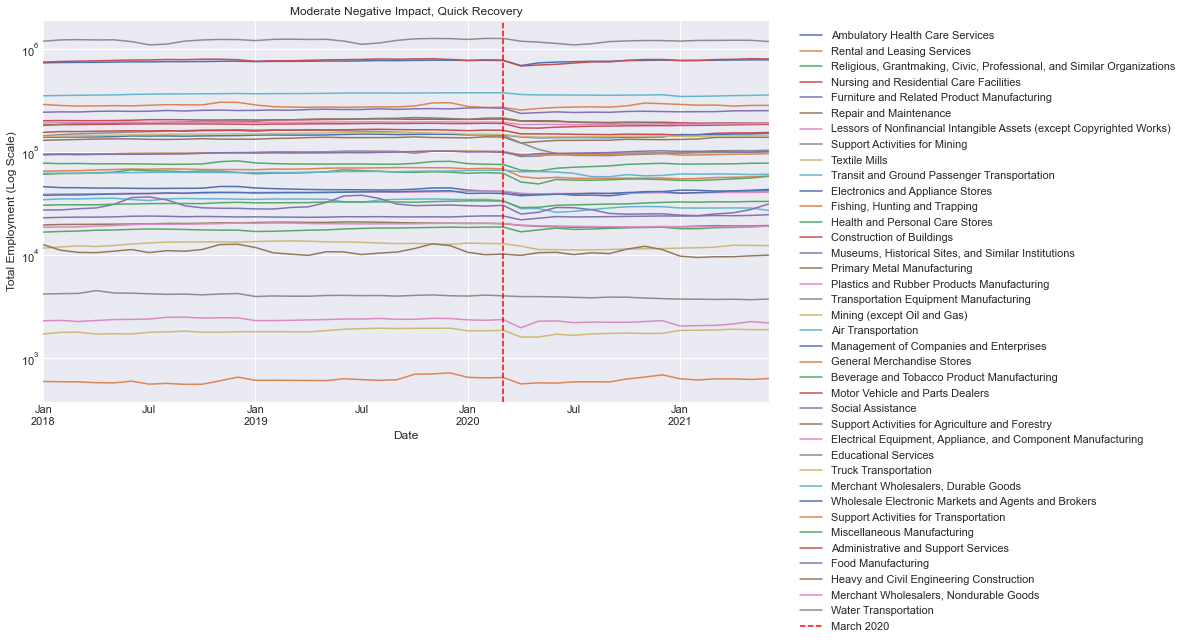

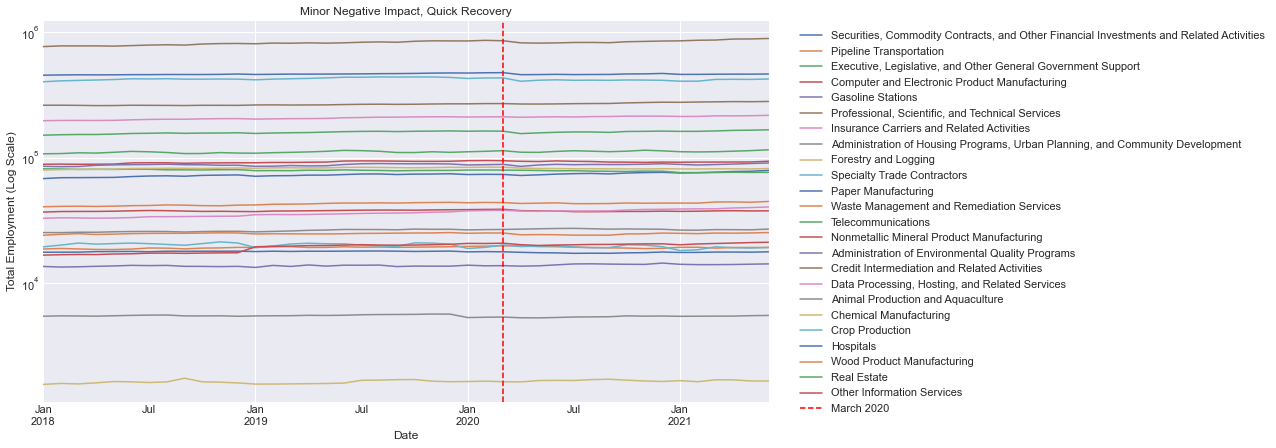

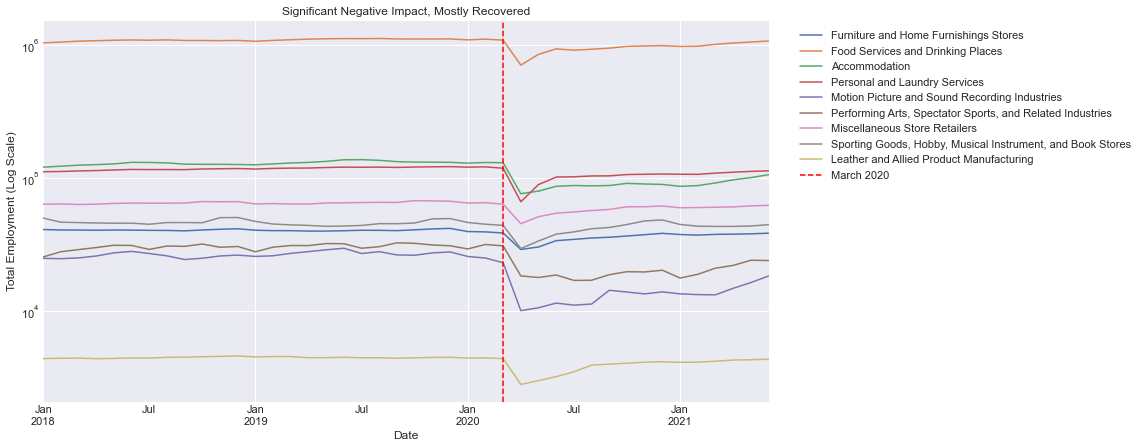

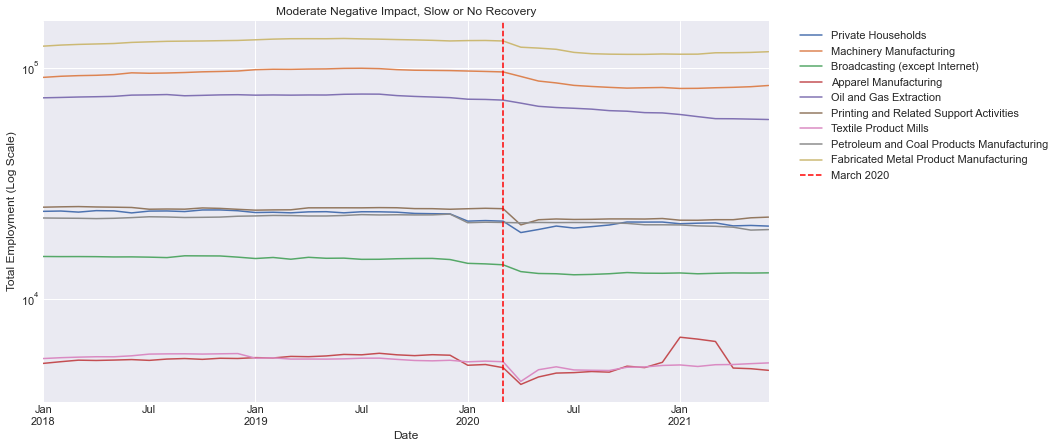

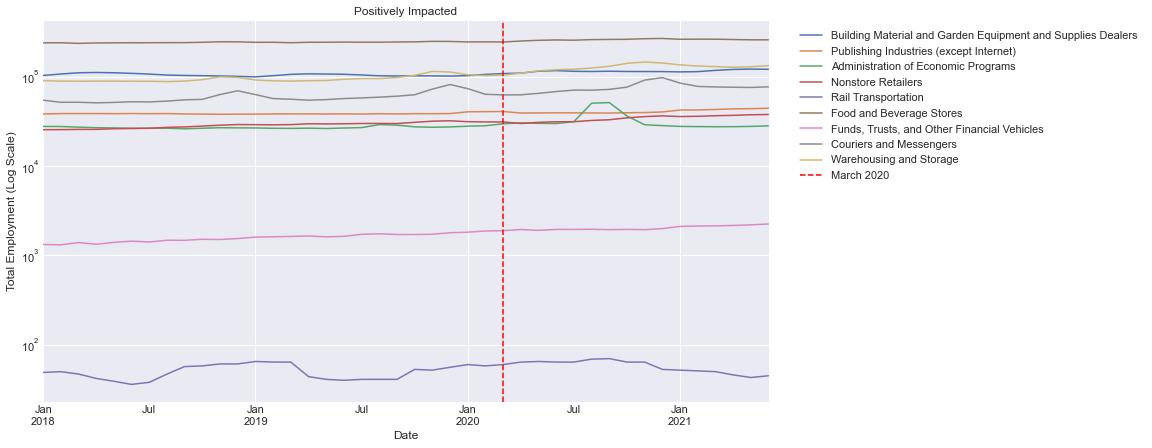

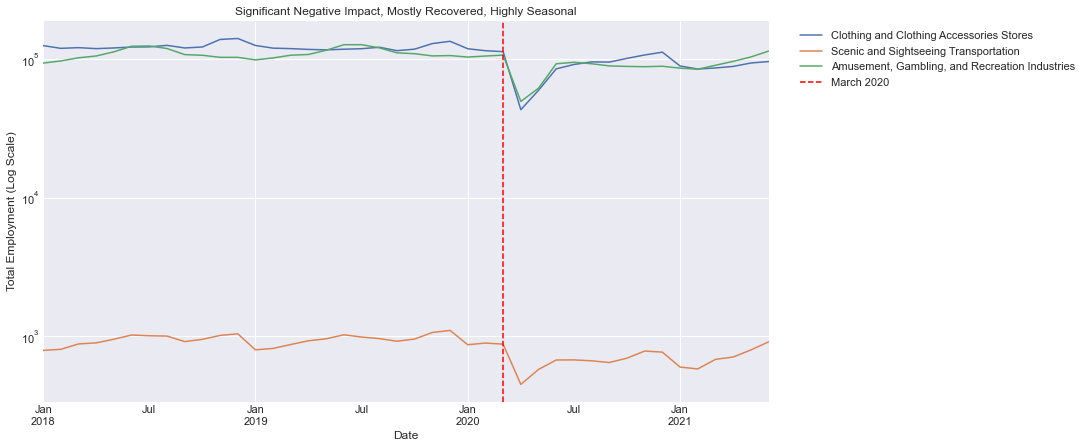

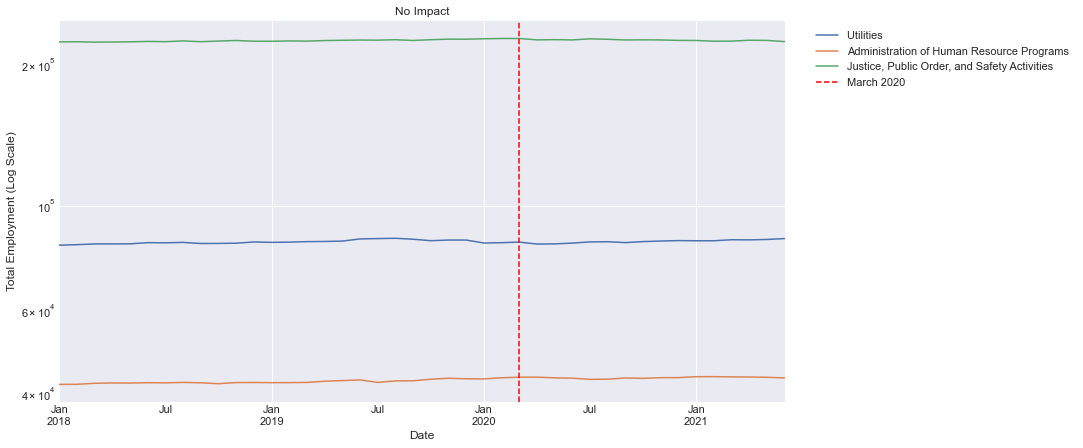

In [23]:
e.load_acquire_to_cluster_lines(loaded_model)

In [24]:
# this function will do whole pipeline from acquire to final clustering plots
# e.load_acquire_to_cluster(loaded_model)

#### Takeaways:
- Clustering models were able to group times series data for different industries into groups that make sense
- The clusters produced along with number of industries in each group were:
    - Moderate Negative Impact, Quick Recovery : 38
    - Minor Negative Impact, Quick Recovery : 24
    - Moderate Negative Impact, Slow or No Recovery : 9
    - Significant Negative Impact, Mostly Recovered : 9
    - Positively Impacted : 9
    - Significant Negative Impact, Mostly Recovered, Highly Seasonal : 3
    - No Impact: 3

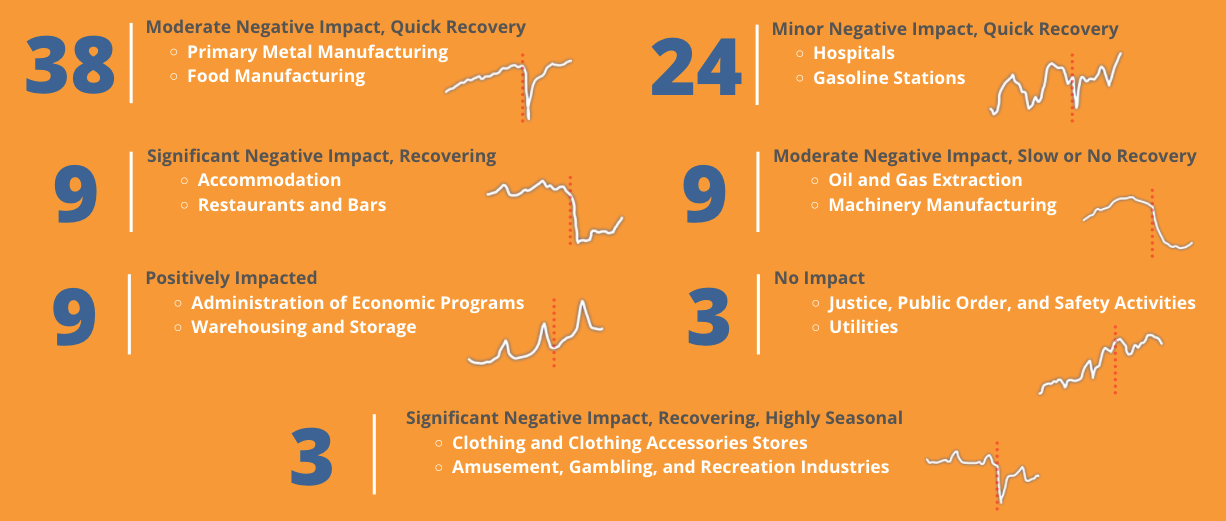

---
## Forecasting 
---

In [25]:
# get dictionary with all industries
# get all monthly data
df = w.get_tx_forecasting_data()
# subset data into a dictionary of dfs
industry_df_dict, ind_list = w.create_df_dict_forecasting(df)

In [26]:
# list of industries I will forecast
forecast_ind_list = [
    'Performing Arts, Spectator Sports, and Related Industries',
    'Miscellaneous Store Retailers ',
    'Sporting Goods, Hobby, Musical Instrument, and Book Stores ',
    'Accommodation',
    'Food Services and Drinking Places',
    'Motion Picture and Sound Recording Industries',
    'Personal and Laundry Services',
    'Furniture and Home Furnishings Stores ',
    'Leather and Allied Product Manufacturing',
    'Amusement, Gambling, and Recreation Industries',
    'Scenic and Sightseeing Transportation',
    'Clothing and Clothing Accessories Stores '
]

In [27]:
# create dictionary of dfs for these industries
forecast_ind_dict = {}
for ind in forecast_ind_list:
    forecast_ind_dict[ind] = industry_df_dict[ind]

---
### Plot All Industries to be Used for Forecasting

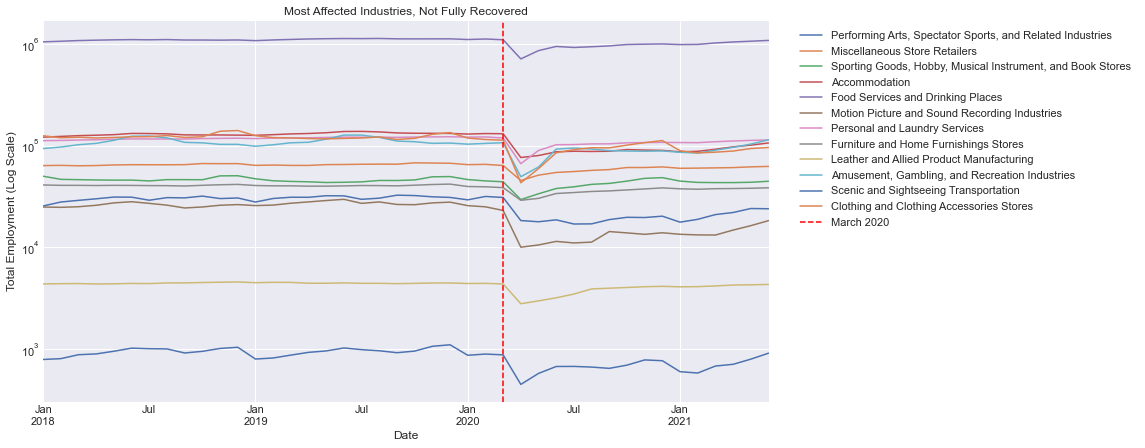

In [28]:
# take a look at industries
for ind in forecast_ind_list:
    forecast_ind_dict[ind]['2018' : ].plot(label=ind)
plt.gca().set(ylabel = 'Total Employment (Log Scale)', title='Most Affected Industries, Not Fully Recovered')
plt.gca().axvline(x='2020-03', color = 'red', linestyle = '--', label='March 2020')
plt.yscale('log')
plt.legend(bbox_to_anchor= (1.03,1))
plt.show()

---
### Example - Motion Picture and Sound Recording Industries

#### Plot

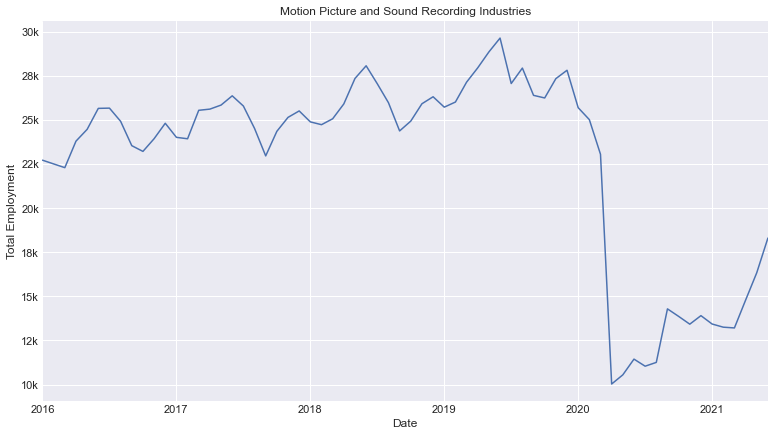

In [29]:
# plot series
s_motion = forecast_ind_dict['Motion Picture and Sound Recording Industries']
s_motion.plot()
plt.gca().set(ylabel = 'Total Employment', title='Motion Picture and Sound Recording Industries')
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}k'.format(x / 1_000));

#### Recovery

In [30]:
# find min value where employment bottomed out and recovery started
s_motion[s_motion == s_motion.min()]

Date
2020-04-01    10034
Name: Total Employment, dtype: int64

In [31]:
# define train set for this model
train = s_motion['2020-04' : ]

In [32]:
# Holts model
model = Holt(train, exponential = False)
model = model.fit(smoothing_level = 0, 
                  smoothing_trend = 0,
                  optimized = True)

# redefine future index based on when recovery occured
future_index_str = [
    '2021-07',
    '2021-08',
    '2021-09',
    '2021-10',
    '2021-11', 
    '2021-12', 
    '2022-01', 
    '2022-02', 
    '2022-03',
    '2022-04',
    '2022-05',
    '2022-06',
    '2022-07',
    '2022-08',
    '2022-09',
    '2022-10',
    '2022-11', 
    '2022-12', 
    '2023-01', 
    '2023-02', 
    '2023-03',
    '2023-04',
    '2023-05',
    '2023-06',
    '2023-07',
    ]

future_index = pd.to_datetime(future_index_str)

holts = model.predict(start = future_index[0], end = future_index[-1])

/usr/local/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


#### Resumption

In [33]:
train = s_motion['2016' : '2018']
test = s_motion['2019']

In [34]:
forecast = train['2018'] + train.diff(12).mean()
forecast.index = test.index

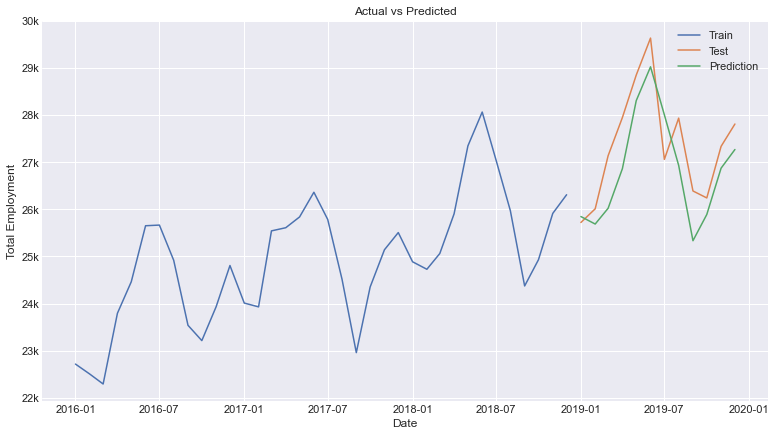

In [35]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.xlabel('Date')
plt.ylabel('Total Employment')
plt.plot(forecast, label = 'Prediction')
plt.title('Actual vs Predicted')
plt.legend()
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}k'.format(x / 1_000))
plt.show()

In [36]:
# get RMSE
mean_squared_error(test, forecast, squared=False)

755.7787110453997

In [37]:
# get R^2
explained_variance_score(test, forecast)

0.7461388782842269

In [38]:
# predict the future
# want to predict into future to get us to end of year 2023
# get values for respective months preceding pandemic 2018-11 to 2019-12
historical = s_motion['2018-08' : '2019-12']

In [39]:
# get index for seasonal prediction
future_index_str = [
    '2023-08',
    '2023-09',
    '2023-10',
    '2023-11', 
    '2023-12', 
    '2024-01', 
    '2024-02', 
    '2024-03',
    '2024-04',
    '2024-05',
    '2024-06',
    '2024-07',
    '2024-08',
    '2024-09',
    '2024-10',
    '2024-11',
    '2024-12'
    ]

future_index = pd.to_datetime(future_index_str)

In [40]:
# make predictions
future = historical + train.diff(12).mean()
# still need to reset the index
future.index = future_index

#### Final Plot

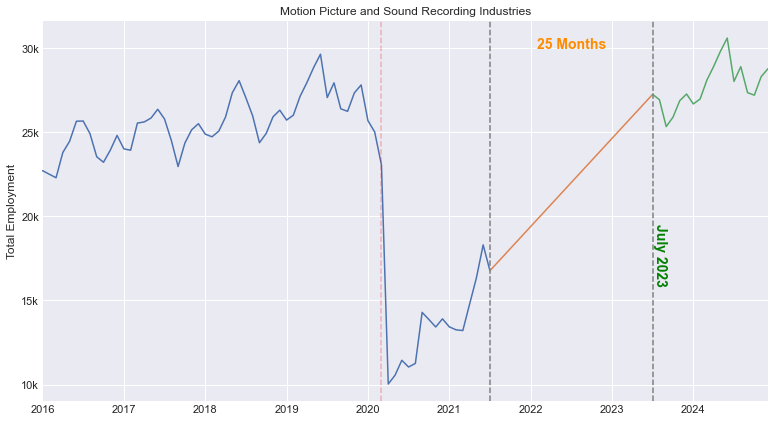

In [41]:
full_forecast = pd.concat([s_motion, holts, future])
full_forecast[ : '2021-07'].plot() # data we have
full_forecast['2021-07' : '2023-07'].plot() # linear recovery forecast
full_forecast['2023-07' : ].plot() # resumption forecast
plt.gca().axvline(x='2021-07', linestyle='--', color='gray')
plt.gca().axvline(x='2023-07', linestyle='--', color='gray')
plt.gca().axvline(x='2020-03', linestyle='--', color='red', alpha=0.25)
plt.text('2022-02', 30_000, '25 Months', fontsize=14, color='darkorange', fontweight='bold')
plt.text('2023-07', 16_000, 'July 2023', fontsize=14, color='green', fontweight='bold', rotation='-90')
plt.gca().set(title='Motion Picture and Sound Recording Industries', 
              ylabel='Total Employment')
plt.gca().yaxis.set_major_formatter(lambda x, pos: '{:.0f}k'.format(x / 1_000));

---
### Months to Recovery

In [42]:
char_df = e.create_char_df_forecasting(forecast_ind_dict)

In [43]:
months_to_recovery = {
    'Motion Picture and Sound Recording Industries' : 25,
    'Performing Arts, Spectator Sports, and Related Industries' : 16,
    'Accommodation' : 26,
    'Clothing and Clothing Accessories Stores ' : 9,
    'Scenic and Sightseeing Transportation' : 13,
    'Amusement, Gambling, and Recreation Industries' : 3,
    'Personal and Laundry Services' : 9,
    'Miscellaneous Store Retailers ' : 7,
    'Furniture and Home Furnishings Stores ' : 7,
    'Food Services and Drinking Places' : 5,
    'Leather and Allied Product Manufacturing' : 3,
    'Sporting Goods, Hobby, Musical Instrument, and Book Stores ' : 0
}

In [44]:
char_df['months_to_recovery'] = char_df.index.map(months_to_recovery)

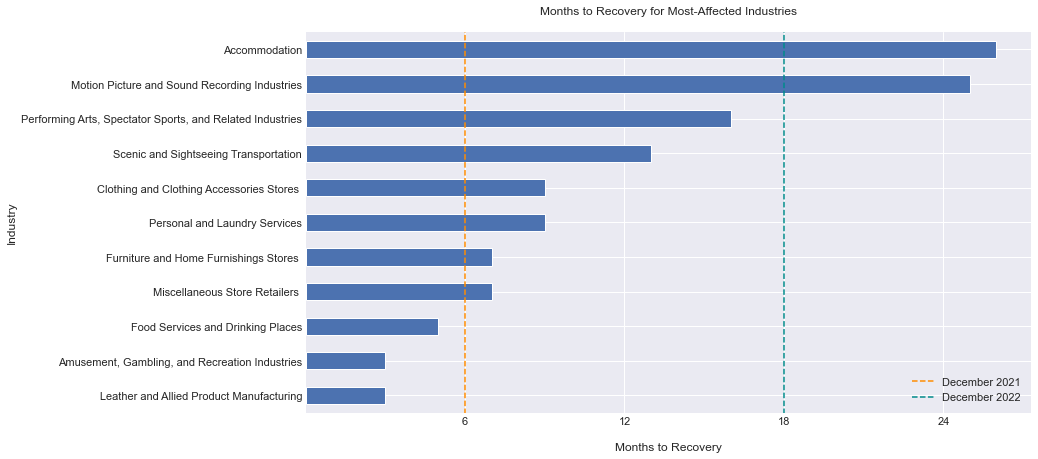

In [45]:
char_df.months_to_recovery.sort_values(ascending=True).drop('Sporting Goods, Hobby, Musical Instrument, and Book Stores ').plot.barh(label='')
plt.gca().set(ylabel='Industry', xlabel='\nMonths to Recovery', title='Months to Recovery for Most-Affected Industries\n');
plt.vlines(x=6, ymin=-1, ymax=12, linestyles='--', colors='darkorange', label='December 2021')
plt.vlines(x=18, ymin=-1, ymax=12, linestyles='--', colors='darkcyan', label='December 2022')
plt.xticks(ticks=[6,12,18,24]);
plt.legend(loc='lower right');

---
## Conclusions and Next Steps
---

**Conclusions/Takaways:**
- Effect on industries
    - 87% Negative Impact
    - 10% Positive Impact
    - 3% No Impact
- Recovery timelines for 11 most-affected industries varied from 3 to 26 months from end of data (June 2021)
- Demographics Most Affected
    - Gender:  Women
    - Ethnicity: Hispanic or Latino
    - Race: African Americans
    - Age: 34 and below, especially 22-24
    - Education Level:  Those without a Bachelor's or Advanced Degree

**Recommendations:**
- Industries now have a better understanding of appropriate employment levels during a pandemic
- Planning and preparation
- State and local governments should also examine the disparity among demographic subgroups

**Next Steps:**
- Adjust forecasting model as new data becomes available 
- Examine the Pandemic's affect on the national economy
- Compare industry clusters by state
- Compare demographic job loss information by state